### Building a Random Forest

Let's begin by building a different ensemble model from scratch.  We'll train our random forest by sampling from our training data, and then training a decision tree on the sampled data.

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [6]:
dtrs = []
for i in range(5):
    X_sample = X_train.sample(n=10000, replace = True)
    y_sample = y_train.loc[X_sample.index]
    dtr = DecisionTreeRegressor(min_samples_leaf=5).fit(X_sample, y_sample) 
    dtrs.append(dtr)

In [18]:
dtrs[:3]

[DecisionTreeRegressor(min_samples_leaf=5),
 DecisionTreeRegressor(min_samples_leaf=5),
 DecisionTreeRegressor(min_samples_leaf=5)]

In [16]:
import numpy as np
predictions = np.stack([dtr.predict(X_test) for dtr in dtrs])

In [17]:
predictions.shape

(5, 5160)

We can see that we now have five predictions for each of the 5160 observations in the test set. Then to make a prediction we simply take the average of the predictions for each sample.

In [26]:
rf_predictions = predictions.mean(axis = 0)
rf_predictions

array([1.32164   , 2.90960667, 1.44657778, ..., 1.77852889, 2.58061667,
       4.86794947])

Finally, we can calculate the root mean squared error with the following:

In [28]:
from sklearn.metrics import r2_score

r2_score(y_test, rf_predictions)

0.776080967969691

And we see that even with just five decision trees, this does a pretty good job.

In [83]:
r2_scores_rfr = [r2_score(y_test, np.mean(rfr_predictions[:i + 1], axis = 0)) 
             for i in range(0, len(rfr.estimators_)) ]

In [84]:
import plotly.graph_objects as go
r2_xg_scatter = go.Scatter(x = list(range(len(trees_200))), y = r2_scores_grad, name = 'xgboost')
r2_rfr_scatter = go.Scatter(x = list(range(len(rfr_predictions))), y = r2_scores_rfr, name = 'random forest')

fig = go.Figure([r2_xg_scatter, r2_rfr_scatter], layout = {'title': 'gradient boosting vs random forest', 
                                                           'xaxis': {'title': '# trees'}, 'yaxis': {'title': '$r^2$'} })


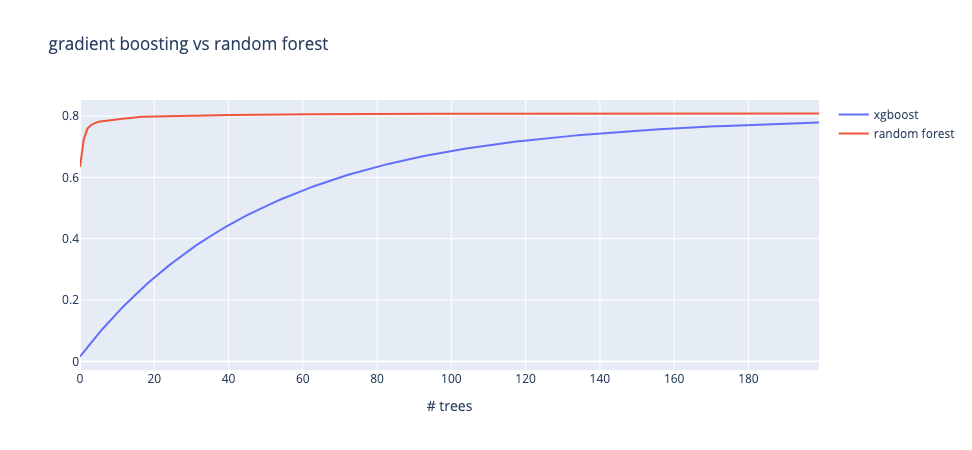

In [85]:
fig